# CODE SENTINEL - Artificial Intelligence  

## Task 3: Build and Train a Neural Network with Keras/TensorFlow  
in this task, we build a Convolutional Neural Network (CNN) to classify handwritten digits (0–9) from the MNIST dataset.

### Project: MNIST Digit Classification  

Steps:  
1. Load and preprocess the MNIST dataset.  
2. Visualize some sample images.  
3. Build a CNN with hidden layers, activation functions, and dropout.  
4. Train and evaluate the model.  
5. Plot training history (loss & accuracy).  
6. Test the model on unseen data.  


Training shape: (60000, 28, 28, 1) (60000,)
Test shape: (10000, 28, 28, 1) (10000,)


2025-08-28 17:46:58.919329: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.7484 - loss: 0.7668 - val_accuracy: 0.9795 - val_loss: 0.0718
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9576 - loss: 0.1395 - val_accuracy: 0.9858 - val_loss: 0.0487
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.9711 - loss: 0.0990 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9745 - loss: 0.0840 - val_accuracy: 0.9897 - val_loss: 0.0371
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9792 - loss: 0.0737 - val_accuracy: 0.9892 - val_loss: 0.0360
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9799 - loss: 0.0657 - val_accuracy: 0.9898 - val_loss: 0.0368
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9823 - loss: 0.0591 - val_accuracy: 0.9910 - val_loss: 0.0337
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9839 - loss: 0.0539 - 

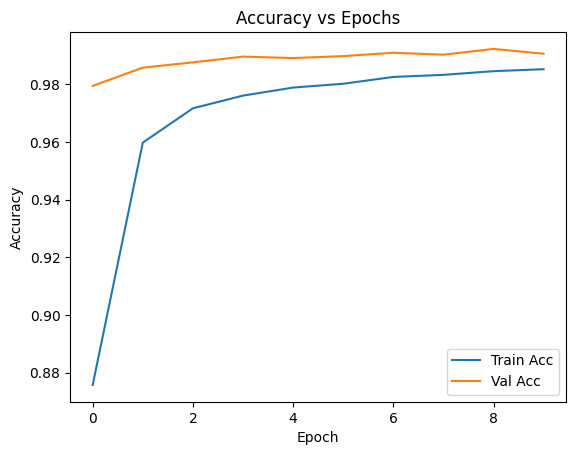

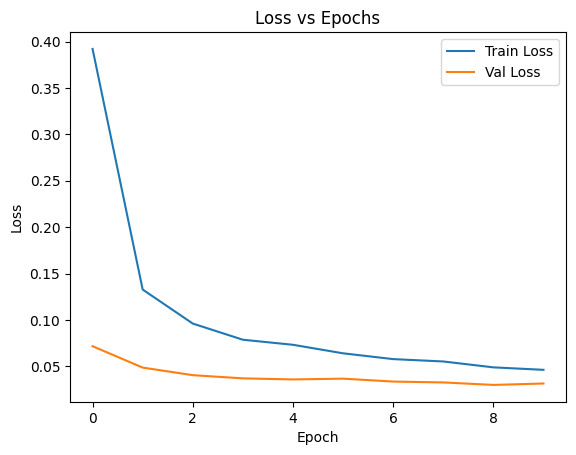

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# 1) Load MNIST from Kaggle input folder
train = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
test = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

# 2) Split features & labels
y_train = train["label"].values
x_train = train.drop("label", axis=1).values.reshape(-1, 28, 28, 1).astype("float32") / 255.0

y_test = test["label"].values
x_test = test.drop("label", axis=1).values.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print("Training shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

# 3) Build CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# 4) Train model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# 5) Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

# 6) Visualize training history
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()
